# Submission 2 - Intermediate

**Instructions**
- Fill out the 'Basic Information' and 'Simple Hypotheses - Findings / Insights' sections (replace the TODOs with your information)
  - If your visualization is interactive, create a short video that shows the interactivity (max. 3 min).
- Export the Jupyter notebook as a HTML file and save it in this repository.
  - Go to 'File' -> 'Save and Export Notebook As..' -> 'HTML'.
  - Save it locally in your project folder. You can leave the name as it is.
  - If you have a video, then add it to the project folder.
  - Push your local changes to the GitHub repository.
- Upload the generated HTML for the Moodle submission.
  - If you have a video, then upload that for the Moodle submission, too.

---
## Basic Information

**Team Name:** TODO

**Team Members:**
- TODO
- TODO
- TODO
- TODO

**Dataset Description:**  
(max. 75 words)

TODO

---
## Simple Hypotheses - Findings / Insights

**Instructions:**
- Add your visualizations (**max. 4**) here
  - The visualizations should show the findings / insights
- Add the descriptions for all your findings / insights (**max. 150 words**)
  - The description should also relate to the visualizations above.

### Visualizations

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('./CovidFaelle_Timeline.csv', delimiter=';')
df.head()

,Time,Bundesland,BundeslandID,AnzEinwohner,AnzahlFaelle,AnzahlFaelleSum,AnzahlFaelle7Tage,SiebenTageInzidenzFaelle,AnzahlTotTaeglich,AnzahlTotSum,AnzahlGeheiltTaeglich,AnzahlGeheiltSum
0,26.02.2020 00:00:00,Burgenland,1,299235,0,0,0,0,0,0,0,0
1,26.02.2020 00:00:00,Kärnten,2,566166,0,0,0,0,0,0,0,0
2,26.02.2020 00:00:00,Niederösterreich,3,1708140,0,0,0,0,0,0,0,0
3,26.02.2020 00:00:00,Oberösterreich,4,1512226,0,0,0,0,0,0,0,0
4,26.02.2020 00:00:00,Salzburg,5,564293,0,0,0,0,0,0,0,0


In [8]:
df = df[['Time', 'AnzahlFaelle']]
df['Time'] = df['Time'].str.strip('00:00:00').str.strip(' ')
df['Time'] = df['Time'].str.split('.').apply(lambda x: '-'.join((reversed(x))))
df.sample(5)

,Time,AnzahlFaelle
568,2020-04-22,23
5203,2021-07-30,86
2719,2020-11-23,4609
2283,2020-10-11,135
1941,2020-09-7,5


In [9]:
# seasons
df_s = pd.DataFrame({'start':['2020-03-20','2020-06-20','2020-09-22','2020-12-21','2021-03-20','2021-06-21','2021-09-22','2021-12-21','2022-03-20','2022-06-21'], 'end':['2020-06-19','2020-09-21','2020-12-20','2021-03-19','2021-06-20','2021-09-21','2021-12-20','2022-03-19','2022-06-20','2022-09-22']})

In [10]:
sum_spr_2020 = df.loc[(df['Time'] > df_s['start'][0]) & (df['Time'] < df_s['end'][0])]['AnzahlFaelle'].sum()
sum_sum_2020 = df.loc[(df['Time'] > df_s['start'][1]) & (df['Time'] < df_s['end'][1])]['AnzahlFaelle'].sum()
sum_aut_2020 = df.loc[(df['Time'] > df_s['start'][2]) & (df['Time'] < df_s['end'][2])]['AnzahlFaelle'].sum()
sum_wint_2021 = df.loc[(df['Time'] > df_s['start'][3]) & (df['Time'] < df_s['end'][3])]['AnzahlFaelle'].sum()
sum_spr_2021 = df.loc[(df['Time'] > df_s['start'][4]) & (df['Time'] < df_s['end'][4])]['AnzahlFaelle'].sum()
sum_sum_2021 = df.loc[(df['Time'] > df_s['start'][5]) & (df['Time'] < df_s['end'][5])]['AnzahlFaelle'].sum()
sum_aut_2021 = df.loc[(df['Time'] > df_s['start'][6]) & (df['Time'] < df_s['end'][6])]['AnzahlFaelle'].sum()
sum_wint_2022 = df.loc[(df['Time'] > df_s['start'][7]) & (df['Time'] < df_s['end'][7])]['AnzahlFaelle'].sum()
sum_spr_2022 = df.loc[(df['Time'] > df_s['start'][8]) & (df['Time'] < df_s['end'][8])]['AnzahlFaelle'].sum()
sum_sum_2022 = df.loc[(df['Time'] > df_s['start'][9]) & (df['Time'] < df_s['end'][9])]['AnzahlFaelle'].sum()

In [11]:
year_2020_sums = [np.nan, sum_spr_2020, sum_sum_2020, sum_aut_2020]
year_2021_sums = [sum_wint_2021, sum_spr_2021, sum_sum_2021, sum_aut_2021]
year_2022_sums = [sum_wint_2022, sum_spr_2022, sum_sum_2022, np.nan]
labels = ['Winter', 'Spring', 'Summer', 'Autumn']

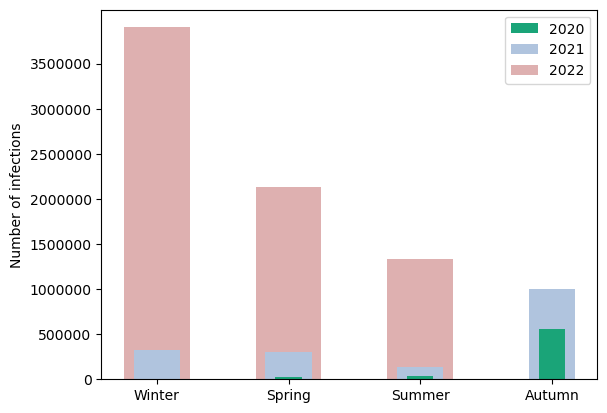

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(x=labels, height=year_2022_sums, width=0.5, align='center', label='2022', color='#deb0b0')
ax.bar(x=labels, height=year_2021_sums, width=0.35, align='center', label='2021', color='#b0c4de')
ax.bar(x=labels, height=year_2020_sums, width=0.2, align='center', label='2020', color='#1AA478')

plt.xticks(labels)
plt.yticks(np.arange(0, sum_wint_2022, 500000))
plt.ylabel('Number of infections')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

legend_handles, legend_labels = plt.gca().get_legend_handles_labels()
legend_order = [2,1,0]
plt.legend([legend_handles[idx] for idx in legend_order],[legend_labels[idx] for idx in legend_order],loc='upper right')

plt.show()

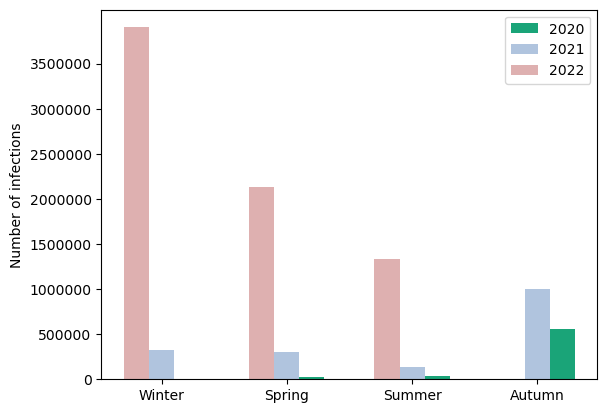

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

width = 0.2

x = np.arange(len(labels))

ax.bar(x - width, height=year_2022_sums, width=0.2, label='2022', color='#deb0b0')
ax.bar(x, height=year_2021_sums, width=0.2, label='2021', color='#b0c4de')
ax.bar(x + width, height=year_2020_sums, width=0.2, label='2020', color='#1AA478')



plt.xticks(x, labels)
plt.yticks(np.arange(0, sum_wint_2022, 500000))
plt.ylabel('Number of infections')

# Disable scientific notation for y-axis
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

# order the legends
legend_handles, legend_labels = plt.gca().get_legend_handles_labels()
legend_order = [2,1,0]
plt.legend([legend_handles[idx] for idx in legend_order],[legend_labels[idx] for idx in legend_order],loc='upper right')

plt.show()

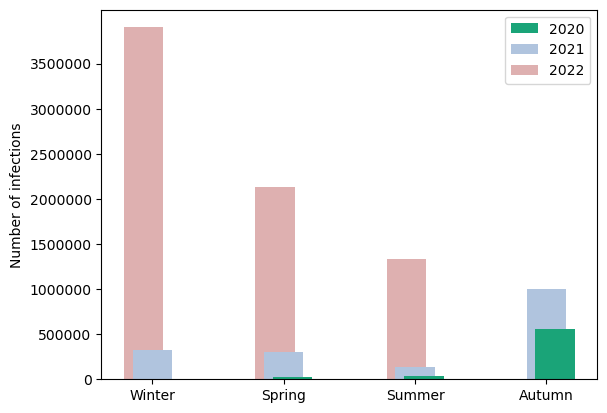

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

width = 0.2

x = np.arange(len(labels))

ax.bar(x - width/3, height=year_2022_sums, width=0.3, label='2022', color='#deb0b0')
ax.bar(x, height=year_2021_sums, width=0.3, label='2021', color='#b0c4de')
ax.bar(x + width/3, height=year_2020_sums, width=0.3, label='2020', color='#1AA478')



plt.xticks(x, labels)
plt.yticks(np.arange(0, sum_wint_2022, 500000))
plt.ylabel('Number of infections')

# Disable scientific notation for y-axis
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

# order the legends
legend_handles, legend_labels = plt.gca().get_legend_handles_labels()
legend_order = [2,1,0]
plt.legend([legend_handles[idx] for idx in legend_order],[legend_labels[idx] for idx in legend_order],loc='upper right')

plt.show()

### Description

TODO